In [17]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import pandas as pd
from scipy.stats import linregress

Stochastic Simulation

In [ ]:
## Simpler model
# The stoichiometry matrix
S = np.array([[1,-1,0,0,0,0,0],
              [0,1,-1,0,0,0,-1],
              [0,0,1,0,0,-1,0],
              [0,0,0,1,-1,0,0]])

def W(x,t,pars=pars):
    return np.array([pars['k1'],
                     pars['k2']*x[0],
                     pars['k3']*x[1],
                     pars['k4']*x[2],
                     pars['k5']*x[3],
                     pars['k6']*x[2],
                     pars['k7']*x[1]])

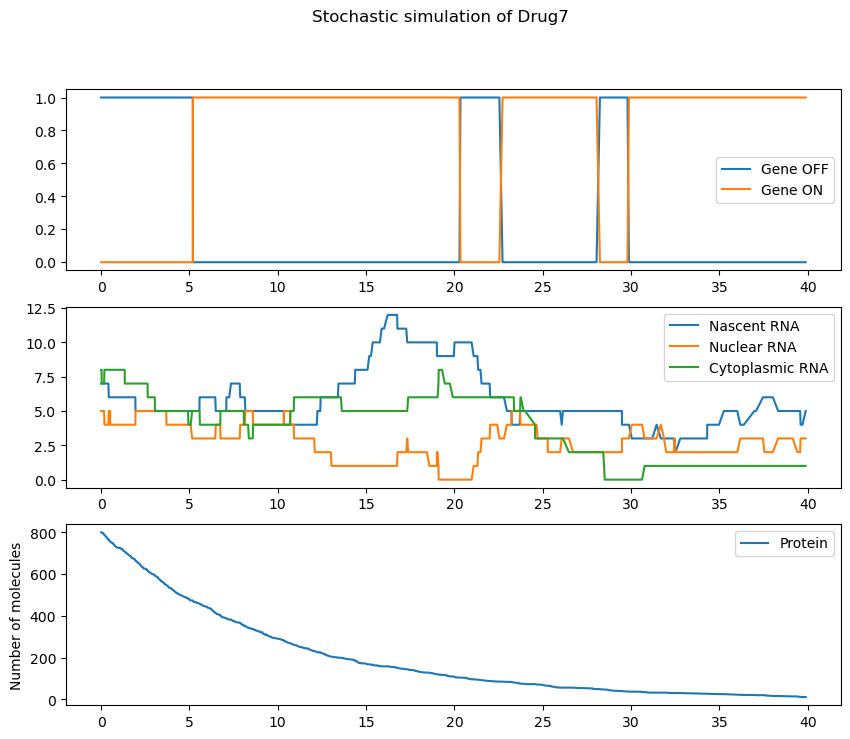

In [14]:
# Set the initial state

# The stoichiometry matrix
S = np.array([[-1,1,0,0,0,0,0,0,0],
              [1,-1,0,0,0,0,0,0,0],
              [0,0,1,-1,0,0,0,0,0],
              [0,0,0,1,-1,0,0,0,-1],
              [0,0,0,0,1,0,0,-1,0],
              [0,0,0,0,0,1,-1,0,0]])

# Define the reaction rate parameters as a dictionary
pars = {'k1-': 0.2, 'k1+': 0.2, 'k2': 0.5, 'k3': 0.1, 'k4': 0.1, 'k5': 0.1, 'k6': 0.1, 'k7': 0.1, 'k8': 0.1}
def W(x,t,pars=pars):
  return np.array([pars['k1+']*x[0],
                   pars['k1-']*x[1],
                   pars['k2']*x[1],
                   pars['k3']*x[2],
                   pars['k4']*x[3],
                   pars['k5']*x[4],
                   pars['k6']*x[5],
                   pars['k7']*x[4],
                   pars['k8']*x[3]])

# Function for picking the naex reaction time
def next_time(x, t, pars):
    return -np.log(np.random.rand()) / np.sum(W(x, t, pars))

# Function for picking the next reaction
def next_reaction(x, t, pars):
    Wx = W(x, t, pars)
    Wx_sum = np.sum(Wx)
    r = np.random.rand()
    i = 0
    W_sum = Wx[0]
    while W_sum / Wx_sum < r:
        i += 1
        W_sum += Wx[i]
    return i

# Gillespie algorithm
def gillespie(x0, t0, tmax, S, pars, returnFullTraj = False):
    # Initialize the time and the state
    t = t0
    x = x0
    
    # Initialize the output (if requested)
    if returnFullTraj:
        times = [t0]
        states = [x0]
    
    # Run the simulation
    while t < tmax:
        # Compute the time of the next reaction
        tau = next_time(x, t, pars)
        t += tau
        
        # Exit the loop if the next reaction is beyond tmax
        if t > tmax:
            break
        
        # Compute the index of the next reaction
        i = next_reaction(x, t, pars)

        # Update the state
        x = x + S[:, i]
        
        # Append the results (if requested)
        if returnFullTraj:
            times.append(t)
            states.append(x)

    # Return the results
    if returnFullTraj:
        # Return the full trajectory
        return np.array(times), np.array(states)
    else:
        # Return only the final state
        return x
    
# Simulation
tmax = 40
x0 = [1, 0, 7, 5, 8, 800]
times, states = gillespie(x0, 0, tmax, S, pars, returnFullTraj=True)

# Plot the results in two subplots. The first subplot shows the number of 'OFF' and 'ON' molecules,
# and the second subplot shows the number of 'Protein' molecules.
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
fig.suptitle('Stochastic simulation of Drug7')
ax[0].plot(times, states[:, 0], label='Gene OFF')
ax[0].plot(times, states[:, 1], label='Gene ON')
ax[0].legend()

ax[1].plot(times, states[:, 2], label='Nascent RNA')
ax[1].plot(times, states[:, 3], label='Nuclear RNA')
ax[1].plot(times, states[:, 4], label='Cytoplasmic RNA')
ax[1].legend()

ax[2].plot(times, states[:, 5], label='Protein')
ax[2].set_ylabel('Number of molecules')
ax[2].legend()

plt.show()

ODE Model

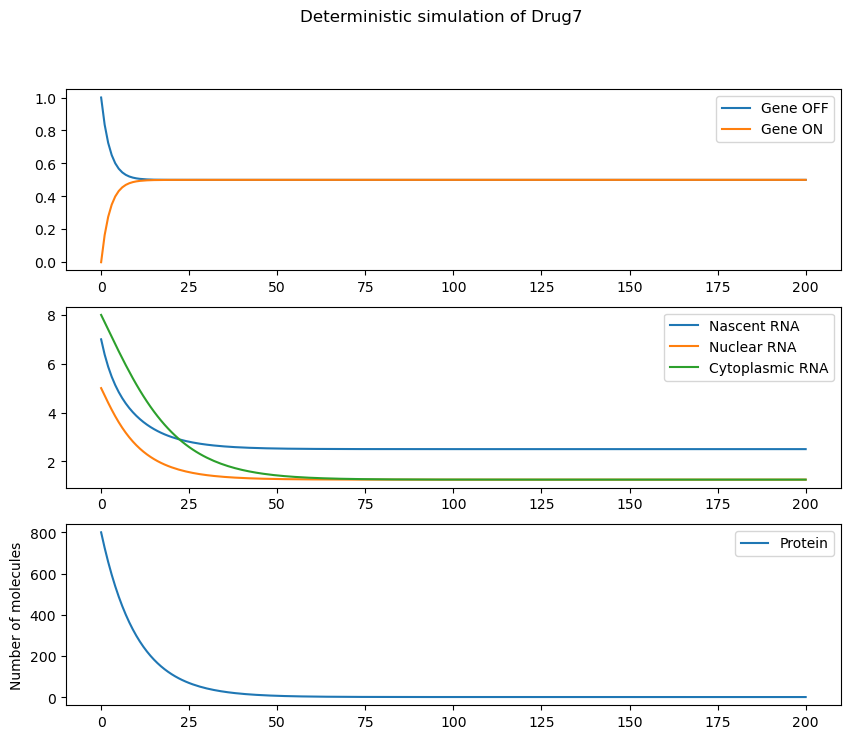

In [15]:
def dxdt(x,t,pars=pars):
  return (S @ W(x,t,pars=pars)).flatten()

timeSpan=np.linspace(0,200,201)
trajectory=odeint(dxdt,x0,timeSpan)

fig, ax = plt.subplots(3, 1, figsize=(10, 8))
fig.suptitle('Deterministic simulation of Drug7')

ax[0].plot(timeSpan, trajectory[:, 0], label='Gene OFF')
ax[0].plot(timeSpan, trajectory[:, 1], label='Gene ON')
ax[0].legend()

ax[1].plot(timeSpan, trajectory[:, 2], label='Nascent RNA')
ax[1].plot(timeSpan, trajectory[:, 3], label='Nuclear RNA')
ax[1].plot(timeSpan, trajectory[:, 4], label='Cytoplasmic RNA')
ax[1].legend()

ax[2].plot(timeSpan, trajectory[:, 5], label='Protein')
ax[2].set_ylabel('Number of molecules')
ax[2].legend()

plt.show()